In [11]:
import pyproj

# Define the source and target coordinate reference systems using their EPSG codes
source_crs = pyproj.CRS("EPSG:26917")  # WGS 84 (latitude and longitude)
target_crs = pyproj.CRS("EPSG:4326")  # UTM Zone 17N 4326

# Create a transformer for the conversion
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Convert coordinates from the source CRS to the target CRS
longitude, latitude = transformer.transform(621601.7, 4854425.86) # 40.7128, -74.0060

print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: 43.83290439602257, Longitude: -79.48752549916786


In [12]:
import pandas as pd
import plotly.express as px
from IPython.display import display, clear_output
import time

# Create a DataFrame with dynamic data (e.g., streaming data)
data = {'Category': ['A', 'B', 'C'],
        'Value': [30, 45, 25]}
df = pd.DataFrame(data)

# Initialize the figure
fig = px.pie(df, names='Category', values='Value', title='Dynamic Pie Chart')

# Display the initial pie chart
display(fig)

# Simulate data updates
for i in range(50):
    time.sleep(0.1)  # Simulate data update delay
    new_data = {'Category': 'A', 'Value': 30 + i, 'time': i}
    df = df.append(new_data, ignore_index=True)

    # Update the pie chart
    fig = px.pie(df, names='Category', values='Value', title='Dynamic Pie Chart')
    
    # Clear the previous plot and display the updated plot
    clear_output(wait=True)
    display(fig)

# Optionally, you can display the final plot for a longer time
time.sleep(2)


In [5]:
import pandas as pd
import plotly.express as px

# Create a DataFrame with data
data = {'Category': ['Category A', 'Category B', 'Category C'],
        'Percentage': [30, 45, 25]}
df = pd.DataFrame(data)

# Create an interactive pie chart
fig = px.pie(df, names='Category', values='Percentage', title='Interactive Pie Chart')

# Show the interactive pie chart
fig.show()

In [8]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Sample DataFrame with 'year' and 'category' columns
data = {'year': [2019, 2019, 2020, 2020, 2021, 2021],
        'category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'value': [10, 15, 12, 18, 11, 16]}
df = pd.DataFrame(data)

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the web application
app.layout = html.Div([
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in df['year'].unique()],
        value=df['year'].max(),
        multi=False
    ),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df['category'].unique()],
        value=df['category'].unique(),
        multi=True
    ),
    dcc.Graph(id='bar-chart')
])

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_bar_chart(selected_year, selected_categories):
    filtered_df = df[(df['year'] == selected_year) & (df['category'].isin(selected_categories))]
    fig = px.bar(filtered_df, x='category', y='value', title=f'Bar Chart for Year {selected_year}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [9]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# Sample DataFrame with 'year' and 'category' columns
data = {'year': [2019, 2019, 2020, 2020, 2021, 2021],
        'category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'value': [10, 15, 12, 18, 11, 16]}
df = pd.DataFrame(data)

# Function to create and display the interactive bar chart
def plot_bar_chart(selected_year, selected_categories):
    filtered_df = df[(df['year'] == selected_year) & (df['category'].isin(selected_categories))]
    fig = px.bar(filtered_df, x='category', y='value', title=f'Bar Chart for Year {selected_year}')
    fig.show()

# Define year and category widgets
year_widget = widgets.Dropdown(options=df['year'].unique(), description='Year:')
category_widget = widgets.SelectMultiple(options=df['category'].unique(), description='Category:')

# Create an interactive plot using IPywidgets
interactive_plot = interactive(plot_bar_chart, selected_year=year_widget, selected_categories=category_widget)
output = interactive_plot.children[-1]

# Display the widgets and the interactive plot
display(year_widget, category_widget, output)


Dropdown(description='Year:', options=(2019, 2020, 2021), value=2019)

SelectMultiple(description='Category:', options=('A', 'B'), value=())

Output()

In [10]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame with 'year' and 'category' columns
data = {'year': [2019, 2019, 2020, 2020, 2021, 2021],
        'category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'value': [10, 15, 12, 18, 11, 16]}
df = pd.DataFrame(data)

# Function to create and display the interactive bar chart
def plot_bar_chart(selected_year):
    filtered_df = df[df['year'] == selected_year]
    fig = px.bar(filtered_df, x='category', y='value', title=f'Bar Chart for Year {selected_year}')
    fig.show()

# Create a widget for selecting the year
year_widget = widgets.Dropdown(options=df['year'].unique(), description='Select Year:')
interactive_plot = widgets.interactive(plot_bar_chart, selected_year=year_widget)

# Display the widget and the interactive plot
display(interactive_plot)


interactive(children=(Dropdown(description='Select Year:', options=(2019, 2020, 2021), value=2019), Output()),…

In [14]:
data = {('2021', 'Vaughan'): 11347, ('2021', 'Markham'): 7828, ('2021', 'Richmond Hill'): 5566,
        ('2021', 'Newmarket'): 3158, ('2021', 'Georgina'): 2079, ('2021', 'Aurora'): 1622,
        ('2021', 'Whitchurch-Stouffville'): 1114, ('2021', 'East Gwillimbury'): 1061,
        ('2021', 'King'): 922, ('2022', 'Vaughan'): 14209, ('2022', 'Markham'): 9654,
        ('2022', 'Richmond Hill'): 6859, ('2022', 'Newmarket'): 3820, ('2022', 'Georgina'): 2119,
        ('2022', 'Aurora'): 1876, ('2022', 'Whitchurch-Stouffville'): 1240,
        ('2022', 'East Gwillimbury'): 1077, ('2022', 'King'): 989, ('2023', 'Vaughan'): 13817,
        ('2023', 'Markham'): 9267, ('2023', 'Richmond Hill'): 6791, ('2023', 'Newmarket'): 3815,
        ('2023', 'Georgina'): 2090, ('2023', 'Aurora'): 1807, ('2023', 'East Gwillimbury'): 1190,
        ('2023', 'Whitchurch-Stouffville'): 1171, ('2023', 'King'): 891}
df = pd.Series(data).unstack()

# Function to create and display the interactive bar chart
def plot_bar_chart(selected_year):
    filtered_data = df.loc[selected_year]
    fig = px.bar(filtered_data, x=filtered_data.index, y=filtered_data.values,
                 labels={'x': 'Municipality', 'y': 'Value'},
                 title=f'Bar Chart for Year {selected_year}')
    fig.show()

# Create a widget for selecting the year
year_widget = widgets.Dropdown(options=df.index, description='Select Year:')
interactive_plot = widgets.interactive(plot_bar_chart, selected_year=year_widget)

# Display the widget and the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', options=('2021', '2022', '2023'), value='2021'), Ou…

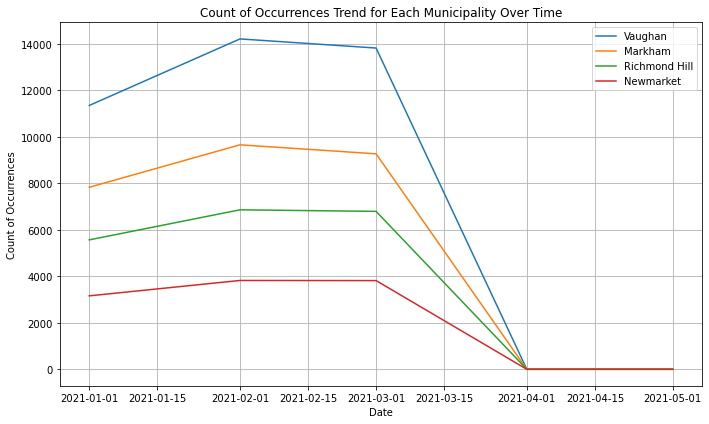

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your own dataset)
data = {
    'rep_date': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Vaughan': [11347, 14209, 13817, 0, 0],
    'Markham': [7828, 9654, 9267, 0, 0],
    'Richmond Hill': [5566, 6859, 6791, 0, 0],
    'Newmarket': [3158, 3820, 3815, 0, 0],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'rep_date' column to a datetime object
df['rep_date'] = pd.to_datetime(df['rep_date'])

# Set 'rep_date' as the DataFrame index
df.set_index('rep_date', inplace=True)

# Create a multiline chart
plt.figure(figsize=(10, 6))

# Plot each municipality's count of occurrences
for municipality in df.columns:
    plt.plot(df.index, df[municipality], label=municipality)

plt.xlabel('Date')
plt.ylabel('Count of Occurrences')
plt.title('Count of Occurrences Trend for Each Municipality Over Time')
plt.legend()
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()


In [17]:
data = {
    'municipality': ['Vaughan', 'King', 'Newmarket', 'Richmond Hill', 'Markham', 'Georgina', 'East Gwillimbury', 'Aurora', 'Whitchurch-Stouffville'],
    'avg_household_income': [124000, 141000, 110000, 102000, 104000, 98000, 119000, 119000, 122000],
    'population' : [323103, 27333, 87942, 202022, 338503, 47642, 34637, 62057, 49864]
}

income_pop_df = pd.DataFrame(data)
print(income_pop_df)
income_pop_df.to_csv('dataset/Income_Population_Data.csv', index=False)

             municipality  avg_household_income  population
0                 Vaughan                124000      323103
1                    King                141000       27333
2               Newmarket                110000       87942
3           Richmond Hill                102000      202022
4                 Markham                104000      338503
5                Georgina                 98000       47642
6        East Gwillimbury                119000       34637
7                  Aurora                119000       62057
8  Whitchurch-Stouffville                122000       49864


In [19]:
# Advanced Scheduling Optimization for Officer Staffing

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# Function to simulate scheduling adjustments based on current rule

def simulate_advanced_scheduling(current_staff, vacation_days, sick_days, training_days, high_demand_days):
    # Calculate the number of officers available each day
    available_officers = current_staff - (vacation_days + sick_days + training_days)
    # Adjust for high-demand days
    if high_demand_days:
        available_officers -= high_demand_days
    # Placeholder for more complex logic
    print(f'Available officers: {available_officers}')

# Creating interactive widgets
interact(simulate_advanced_scheduling, 
         current_staff=widgets.IntSlider(min=10, max=100, step=1, value=50), 
         vacation_days=widgets.IntSlider(min=0, max=30, step=1, value=10), 
         sick_days=widgets.IntSlider(min=0, max=30, step=1, value=5), 
         training_days=widgets.IntSlider(min=0, max=30, step=1, value=3),
         high_demand_days=widgets.IntSlider(min=0, max=30, step=1, value=5))

interactive(children=(IntSlider(value=50, description='current_staff', min=10), IntSlider(value=10, descriptio…

<function __main__.simulate_advanced_scheduling(current_staff, vacation_days, sick_days, training_days, high_demand_days)>

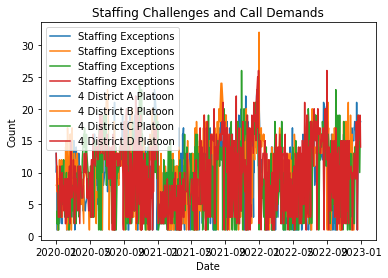

In [29]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

file_name = 'dataset/Community_Safety_Data.csv'
call_file = 'dataset/Calls_for_Service.csv'
staff_file = 'dataset/District_Platoon_Staffing_Exceptions.csv'
# Correcting the EDA for Scheduling Challenges by District

# Loading the District_Platoon_Staffing_Exceptions.csv
district_staffing = pd.read_csv(staff_file)

# Converting dates to datetime format
district_staffing['Exception Date'] = pd.to_datetime(district_staffing['Exception Date'])

# Grouping data by date
district_staffing_grouped = district_staffing.groupby(['Platoon','Exception Date']).count().reset_index()

# Loading the Calls_for_Service.csv
calls_for_service = pd.read_csv(call_file)

# Converting dates to datetime format
calls_for_service['Call Date'] = pd.to_datetime(calls_for_service['Call Date'])

# Grouping data by date
calls_service_grouped = calls_for_service.groupby(['District','Call Date']).agg({'Call Type': 'count'}).rename(columns={'Call Type': 'Call_Count'}).reset_index()

# Merging the datasets for analysis
combined_data = pd.merge(district_staffing_grouped, calls_service_grouped, left_on='Exception Date', right_on='Call Date', how='inner')

# Visualizing the data
sns.lineplot(data=district_staffing_grouped, x='Exception Date', y='# of Hours', hue='Platoon', label='Staffing Exceptions')
#sns.lineplot(data=combined_data, x='Exception Date', y='# of Hours', label='Staffing Exceptions')
#sns.lineplot(data=combined_data, x='Call Date', y='Call_Count', label='Call Demands')
plt.title('Staffing Challenges and Call Demands')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Correcting the Date Column Names and Developing a Forecasting Model

# Data preprocessing
staffing_data['Exception Date'] = pd.to_datetime(staffing_data['Exception Date'])
calls_data['Call Date'] = pd.to_datetime(calls_data['Call Date'])

# Aggregating data
staffing_grouped = staffing_data.groupby('Exception Date').count()
calls_grouped = calls_data.groupby('Call Date').count()  # Using count instead of sum

# Merging datasets
combined_data = pd.merge(staffing_grouped, calls_grouped, left_index=True, right_index=True)

# Developing ARIMA models for both datasets
model_staffing = ARIMA(combined_data['# of Hours'], order=(5,1,0))
model_calls = ARIMA(combined_data['Call Type'], order=(5,1,0))

# Fitting the models
model_staffing_fit = model_staffing.fit()
model_calls_fit = model_calls.fit()

# Forecasting for the next 30 days
forecast_staffing = model_staffing_fit.forecast(steps=30)
forecast_calls = model_calls_fit.forecast(steps=30)

# Combining actual and forecasted data
combined_forecast = pd.concat([combined_data, pd.DataFrame({'Forecasted Staffing': forecast_staffing, 'Forecasted Calls': forecast_calls}, index=pd.date_range(start=combined_data.index[-1], periods=30, freq='D'))])

# Plotting the trends
plt.figure(figsize=(15, 6))
plt.plot(combined_data['# of Hours'], label='Actual Staffing')
plt.plot(combined_data['Call Type'], label='Actual Calls')
plt.plot(combined_forecast['Forecasted Staffing'], label='Forecasted Staffing', linestyle='--')
plt.plot(combined_forecast['Forecasted Calls'], label='Forecasted Calls', linestyle='--')
plt.title('Forecasting Staffing Challenges and Calls for Service')
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.show()